Spot Transit
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.4 installed (uncomment this line if running in an online notebook session such as colab).

In [1]:
#!pip install -I "phoebe>=2.4,<2.5"

As always, let's do imports and initialize a logger and a new bundle.

In [2]:
import phoebe
import numpy as np

b = phoebe.default_binary()

Let's set reasonable (although not necessarily physical) values for the secondary component.

In [3]:
b.flip_constraint('mass@secondary', solve_for='q')
b.set_value(qualifier='mass', component='secondary', value=0.2)
b.set_value(qualifier='requiv', component='secondary', value=0.2)
b.set_value(qualifier='teff', component='secondary', value=300)


We'll add a spot to the primary component.

In [4]:
b.add_spot(component='primary', 
           relteff=0.90, 
           long=0, 
           colat=90, 
           radius=20, 
           feature='spot01')

<ParameterSet: 5 parameters | contexts: compute, feature>

Adding Datasets
-------------------

In [5]:
b.add_dataset('lc', compute_times=phoebe.linspace(-0.1, 0.1, 201))

<ParameterSet: 78 parameters | contexts: constraint, compute, figure, dataset>

Because we have such a cool transiting object, we'll have to use blackbody atmospheres and manually provide limb-darkening.

In [6]:
b.set_value(qualifier='atm', component='secondary', value='blackbody')
b.set_value(qualifier='ld_mode', component='secondary', value='manual')

In [7]:
anim_times = phoebe.linspace(-0.1, 0.1, 101)

In [8]:
b.add_dataset('mesh', compute_times=anim_times, coordinates='uvw', columns='teffs')

<ParameterSet: 85 parameters | contexts: constraint, compute, figure, dataset>

Running Compute
--------------------

In [9]:
b.run_compute(distortion_method='sphere', irrad_method='none')

100%|██████████| 201/201 [00:03<00:00, 59.27it/s]


<ParameterSet: 611 parameters | kinds: mesh, lc>

Plotting 
---------------

In [10]:
print(np.min(b.get_value('teffs', time=0.0, component='primary')), np.max(b.get_value('teffs', time=0.0, component='primary')))

5400.0 6000.0


Let's go through these options (see also the [plot API docs](../api/phoebe.parameters.ParameterSet.plot.md)):
* `time`: make the plot at this single time
* `fc`: (will be ignored by everything but the mesh): set the facecolor to the teffs column.
* `fcmap`: use 'plasma' colormap instead of the default to avoid whites.
* `fclim`: set the limits on facecolor so that the much cooler transiting object doesn't drive the entire range.
* `ec`: disable drawing the edges of the triangles in a separate color.  We could also set this to 'none', but then we'd be able to "see-through" the triangle edges.
* `tight_layout`: use matplotlib's tight layout to ensure we have enough padding between axes to see the labels.


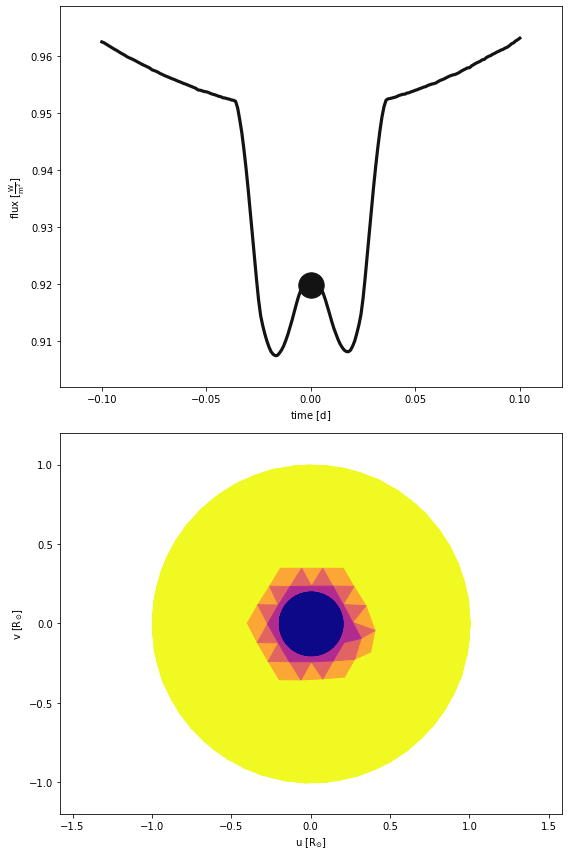

In [11]:
afig, mplfig = b.plot(time=0.0,
                      fc='teffs', fcmap='plasma', fclim=(5000, 6000), 
                      ec='face', 
                      tight_layout=True,
                      show=True)

Now let's animate the same figure in time.  We'll use the same arguments as the static plot above, with the following exceptions:

* `times`: pass our array of times that we want the animation to loop over.
* `consider_for_limits`: for the mesh panel, keep the primary star centered and allow the transiting object to move in and out of the frame.
* `pad_aspect`: pad_aspect doesn't work with animations, so we'll disable to avoid the warning messages.
* `animate`: self-explanatory.
* `save`: we could use `show=True`, but that doesn't always play nice with jupyter notebooks
* `save_kwargs`: may need to change these for your setup, to create a gif, passing {'writer': 'imagemagick'} is often useful.

/home/kyle/.local/lib/python3.8/site-packages/phoebe/dependencies/nparray/nparray.py:408: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return getattr(self.array, operator)(other)


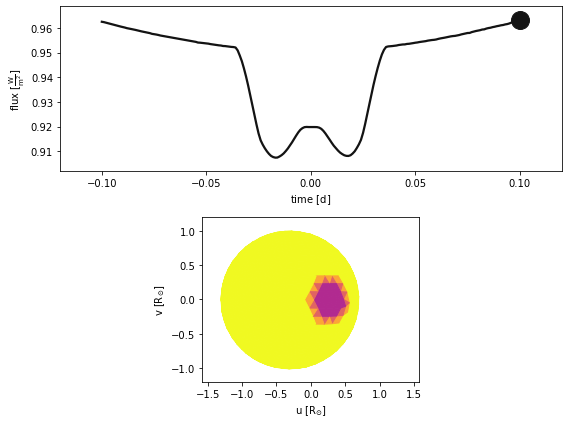

In [12]:
afig, mplfig = b.plot(times=anim_times,
                      fc='teffs', fcmap='plasma', fclim=(5000, 6000), 
                      ec='face', 
                      consider_for_limits={'primary': True, 'secondary': False},
                      tight_layout=True, pad_aspect=False,
                      animate=True, 
                      save='spot_transit.gif',
                      save_kwargs={'writer': 'imagemagick'})

![gif](spot_transit.gif)